In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
all_data = {ticker:web.get_data_yahoo(ticker) for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
all_data

{'AAPL':                   High         Low        Open       Close      Volume  \
 Date                                                                     
 2015-01-20  108.970001  106.500000  107.839996  108.720001  49899900.0   
 2015-01-21  111.059998  108.269997  108.949997  109.550003  48575900.0   
 2015-01-22  112.470001  109.720001  110.260002  112.400002  53796400.0   
 2015-01-23  113.750000  111.529999  112.300003  112.980003  46464800.0   
 2015-01-26  114.360001  112.800003  113.739998  113.099998  55615000.0   
 ...                ...         ...         ...         ...         ...   
 2020-01-13  317.070007  311.149994  311.640015  316.959991  30383000.0   
 2020-01-14  317.570007  312.170013  316.700012  312.679993  40488600.0   
 2020-01-15  315.500000  309.549988  311.850006  311.339996  30480900.0   
 2020-01-16  315.700012  312.089996  313.589996  315.239990  27207300.0   
 2020-01-17  318.739990  315.000000  316.269989  318.730011  34138700.0   
 
              A

In [3]:
price = pd.DataFrame({ticker:data['Adj Close'] for ticker, data in all_data.items()})
price

,AAPL,IBM,MSFT,GOOG
Date,,,,
2015-01-20,99.893822,126.473312,41.647015,505.512115
2015-01-21,100.656441,122.557053,41.225071,516.621643
2015-01-22,103.275063,125.216255,42.311356,532.926819
2015-01-23,103.807991,125.603058,42.356243,538.471619
2015-01-26,103.918228,125.997902,42.203625,533.744629
...,...,...,...,...
2020-01-13,316.959991,136.600006,163.279999,1439.229980
2020-01-14,312.679993,135.820007,162.130005,1430.880005
2020-01-15,311.339996,136.619995,163.179993,1439.199951


In [4]:
volume = pd.DataFrame({ticker: data['Volume'] for ticker, data in all_data.items()})
volume

,AAPL,IBM,MSFT,GOOG
Date,,,,
2015-01-20,49899900.0,8392800.0,36161900.0,2232000.0
2015-01-21,48575900.0,11897100.0,39081100.0,2268700.0
2015-01-22,53796400.0,6120100.0,35898000.0,2676900.0
2015-01-23,46464800.0,4834800.0,26211600.0,2281700.0
2015-01-26,55615000.0,7888100.0,42525500.0,1543700.0
...,...,...,...,...
2020-01-13,30383000.0,3531000.0,21626500.0,1652300.0
2020-01-14,40488600.0,3681000.0,23477400.0,1558900.0
2020-01-15,30480900.0,4045900.0,21417900.0,1282700.0


In [6]:
returns = price.pct_change()
returns

,AAPL,IBM,MSFT,GOOG
Date,,,,
2015-01-20,NaN,NaN,NaN,NaN
2015-01-21,0.007634,-0.030965,-0.010131,0.021977
2015-01-22,0.026015,0.021698,0.026350,0.031561
2015-01-23,0.005160,0.003089,0.001061,0.010404
2015-01-26,0.001062,0.003144,-0.003603,-0.008779
...,...,...,...,...
2020-01-13,0.021364,-0.000658,0.012024,0.006645
2020-01-14,-0.013503,-0.005710,-0.007043,-0.005802
2020-01-15,-0.004286,0.005890,0.006476,0.005815


In [7]:
def a(x):
    positive = 0
    negative = 0
    for item in x:
        if item > 0:
            positive += 1
        else:
            negative += 1    
    return pd.Series([positive/x.count(), negative/x.count()],index=["expand","fall"])
price1=returns.apply(a)
price1

,AAPL,IBM,MSFT,GOOG
expand,0.532591,0.525437,0.543720,0.531797
fall,0.468203,0.475358,0.457075,0.468998


<IPython.core.display.Javascript object>


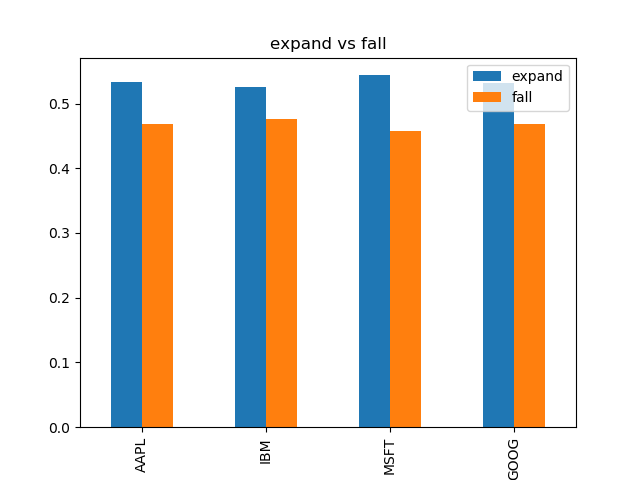

Text(0.5, 1.0, 'expand vs fall')

In [8]:
figure3, ax3 = plt.subplots()
price1.T.plot(ax=ax3, kind='bar')
ax3.set_title('expand vs fall')

In [15]:
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2020-01-06,0.007968,-0.001786,0.002585,0.024657
2020-01-07,-0.004703,0.000671,-0.009118,-0.000624
2020-01-08,0.016086,0.008346,0.015928,0.007880
2020-01-09,0.021241,0.010568,0.012493,0.011044
2020-01-10,0.002261,-0.000366,-0.004627,0.006973


In [16]:
returns['MSFT'].corr(returns['IBM'])

0.4839944627959869

<IPython.core.display.Javascript object>


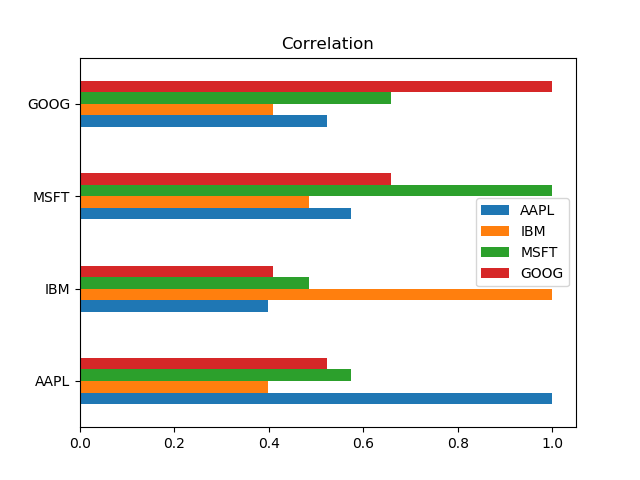

Text(0.5, 1.0, 'Correlation')

In [44]:
corr = returns.corr()
figure1, ax1 = plt.subplots()
corr.plot(ax=ax1, kind='barh')
ax1.set_title('Correlation')

<IPython.core.display.Javascript object>


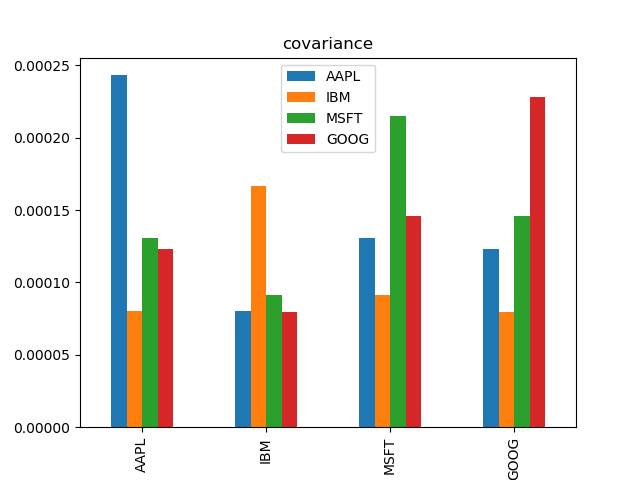

Text(0.5, 1.0, 'covariance')

In [45]:
figure2, ax2 = plt.subplots()
cov = returns.cov()
cov.plot(ax = ax2, kind='bar')
ax2.set_title('covariance')

<IPython.core.display.Javascript object>


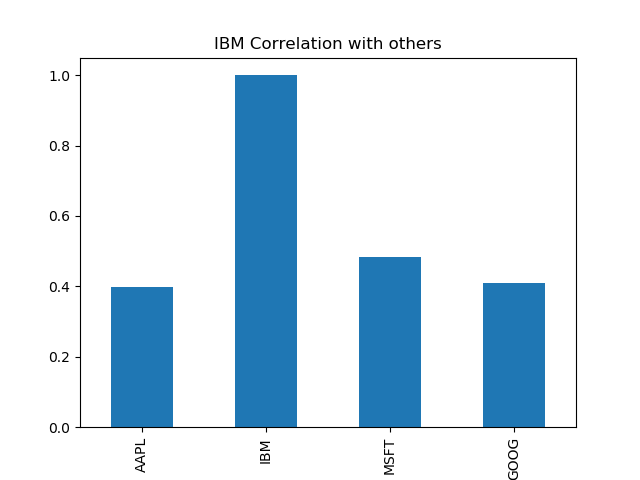

Text(0.5, 1.0, 'IBM Correlation with others')

In [33]:
figure3, ax3 = plt.subplots()
ibmcorr = returns.corrwith(returns.IBM)
ibmcorr.plot(ax = ax3,kind='bar')
ax3.set_title('IBM Correlation with others')